In [3]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#Constants
data_file = "Zillow_pivot_cleaned.csv"
label_file = "Phoenix_Zillow_Codes.xlsx"

In [4]:
labelsdf = pd.read_excel(label_file)
labelsdf = labelsdf.drop(labelsdf.columns[2],axis=1)
#labelsdf["code"] = labelsdf["code"].astype(str)
labelsdf

,code,description
0,C36159_BSICG,median market value of buyer seller index cross
1,C36159_BSICT,median market value of buyer seller index cros...
2,C36159_DOZ,median market value of days on zillow
3,C36159_FOR10K,"median market value of foreclosures per 10,000..."
4,C36159_MDLNSAH,median market value of median daily listings -...
5,C36159_MDLSAAH,median market value of median daily listings -...
6,C36159_MLNSAH,median market value of monthly listings - nsa ...
7,C36159_MLSAAH,median market value of monthly listings - sa -...
8,C36159_MTURN,median market value of monthly turnover
9,C36159_NMLNSAH,median market value of new monthly listings - ...


In [5]:
# Read pivot data
df = pd.read_csv(data_file,parse_dates=['Date'])
# Set data type for series
for code in df.columns:
    if code!='Date':
        df[code] = df[code].astype(float)
print(df.dtypes)
df.head()

Date              datetime64[ns]
C36159_BSICG             float64
C36159_BSICT             float64
C36159_DOZ               float64
C36159_FOR10K            float64
C36159_MDLNSAH           float64
C36159_MDLSAAH           float64
C36159_MLNSAH            float64
C36159_MLSAAH            float64
C36159_MTURN             float64
C36159_NMLNSAH           float64
C36159_NMLSAAH           float64
C36159_SC                float64
C36159_SCBT              float64
C36159_SCMT              float64
C36159_SCSA              float64
C36159_SCSABT            float64
C36159_SCSAMT            float64
C36159_SCSATT            float64
C36159_SCTT              float64
C36159_SP                float64
C36159_SPBT              float64
C36159_SPFS              float64
C36159_SPMT              float64
C36159_SPTT              float64
C36159_STLR              float64
dtype: object


,Date,C36159_BSICG,C36159_BSICT,C36159_DOZ,C36159_FOR10K,C36159_MDLNSAH,C36159_MDLSAAH,C36159_MLNSAH,C36159_MLSAAH,C36159_MTURN,...,C36159_SCSABT,C36159_SCSAMT,C36159_SCSATT,C36159_SCTT,C36159_SP,C36159_SPBT,C36159_SPFS,C36159_SPMT,C36159_SPTT,C36159_STLR
0,2008-01-31,NaN,NaN,NaN,8.17,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-02-29,NaN,NaN,NaN,9.26,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-03-31,NaN,NaN,NaN,9.89,NaN,NaN,NaN,NaN,0.0032,...,482.0,384.0,291.0,238.0,221500.0,156900.0,NaN,244300.0,465500.0,NaN
3,2008-04-30,NaN,NaN,NaN,13.97,NaN,NaN,NaN,NaN,0.0039,...,487.0,349.0,260.0,314.0,212600.0,147400.0,NaN,240300.0,428200.0,NaN
4,2008-05-31,NaN,NaN,NaN,14.80,NaN,NaN,NaN,NaN,0.0042,...,526.0,372.0,257.0,335.0,204600.0,137300.0,NaN,233500.0,413900.0,NaN


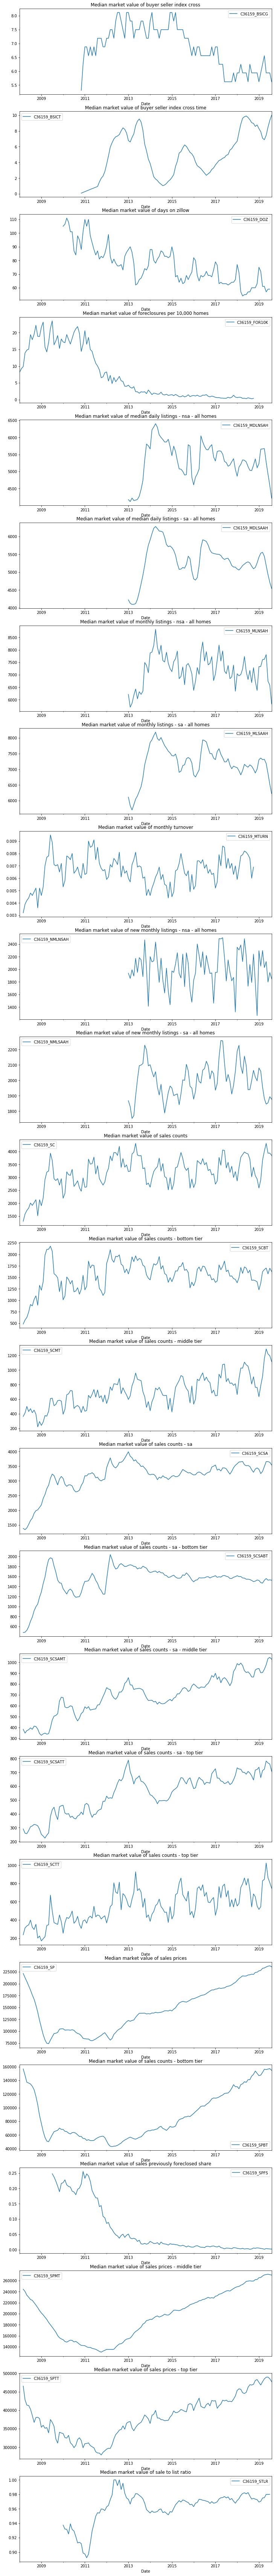

In [6]:
# Plot all series
series = len(df.columns)-1
figs = plt.figure(figsize=(12,5*series))
ax_count = 0
for code in df.columns:
    if code!="Date":
        plot_number = ax_count+1
        description = labelsdf[labelsdf["code"]==code].iat[0,1]
        ax = figs.add_subplot(series,1,plot_number)
        df.plot(x='Date',y=code,ax=ax)
        ax.set_title(description.capitalize())
        ax_count += 1
figs.savefig(f"charts.png")

### Charts of Interest for Phoenix, AZ across tier comparison
* C36159_SCSABT - Monthly Median Sales Count Bottom Tier
* C36159_SCSAMT - Monthly Median Sales Count Middle Tier
* C36159_SCSATT - Monthly Median Sales Count Middle Tier
* C36159_SPBT - Monthly Median Sales Price Bottom Tier
* C36159_SPMT - Monthly Median Sales Price Middle Tier
* C36159_SPTT - Monthly Median Sales Price Top Tier 
* C36159_SP - All homes sale prices
* C36159_FOR10K - Foreclosure rate per 10,000 homes

Text(0.5, 1.0, 'Phoenix, AZ Sales Counts by Tier')

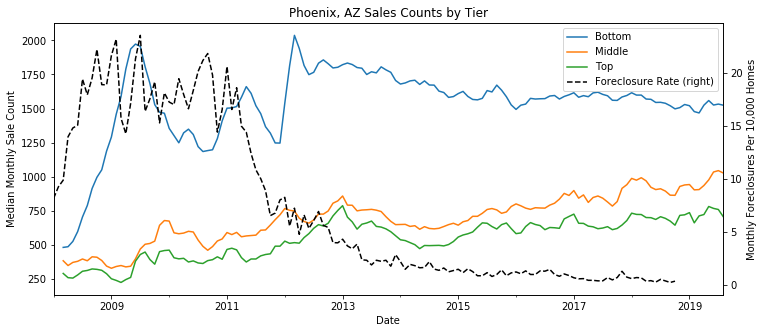

In [31]:
count_fig = plt.figure(figsize=(12,5))
ax_count = count_fig.add_subplot(1,1,1)
df.plot(x='Date',y='C36159_SCSABT',label='Bottom',ax=ax_count)
df.plot(x='Date',y='C36159_SCSAMT',label='Middle',ax=ax_count)
df.plot(x='Date',y='C36159_SCSATT',label='Top',ax=ax_count)
df.plot(x='Date',y='C36159_FOR10K',label='Foreclosure Rate',style='k--',secondary_y=True,ax=ax_count)
ax_count.set_ylabel('Median Monthly Sale Count')
ax_count.right_ax.set_ylabel('Monthly Foreclosures Per 10,000 Homes')
ax_count.set_title('Phoenix, AZ Sales Counts by Tier')

Text(0.5, 1.0, 'Phoenix, AZ Sales Price by Tier')

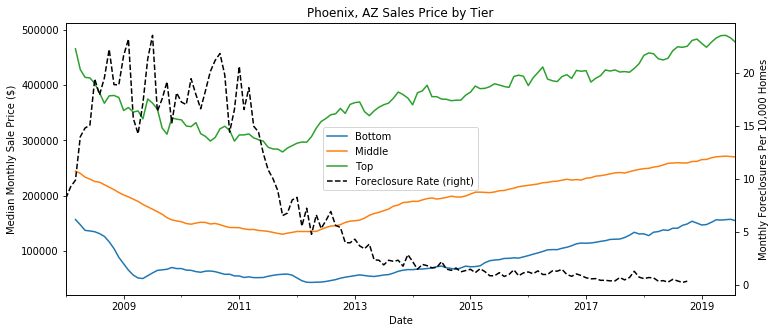

In [30]:
sales_fig = plt.figure(figsize=(12,5))
ax_sales = sales_fig.add_subplot(1,1,1)
df.plot(x='Date',y='C36159_SPBT',label='Bottom',ax=ax_sales)
df.plot(x='Date',y='C36159_SPMT',label='Middle',ax=ax_sales)
df.plot(x='Date',y='C36159_SPTT',label='Top',ax=ax_sales)
df.plot(x='Date',y='C36159_FOR10K',label='Foreclosure Rate',style='k--',secondary_y=True,ax=ax_sales)
ax_sales.set_ylabel('Median Monthly Sale Price ($)')
ax_sales.right_ax.set_ylabel('Monthly Foreclosures Per 10,000 Homes')
ax_sales.set_title('Phoenix, AZ Sales Price by Tier')